#Overview da base de dados 
O objetivo desse estudo é detectar fraudes em transações de cartão de crédito, ou seja compras não realizadas pelo dono do cartão de crédito.

Neste estudo será utilizada uma base de dados contendo transações de cartões de crédito em setembro de 2013 realizadas por europeus. Ela contem transações realizadas em 2 dias sendo 492 fraudes dentre 284.807 transações.

A base contem somente variáveis numéricas e são resultados de uma transformação PCA, sendo assim, não temos informações sobre o significado e contexto das variáveis,sendo elas:

* 28 variáveis resultantes do PCA (V1-V28)
* Time - é o tempo em segundos entre cada transação e a primeira 
* Amount - é o valor da transação

Alguns assuntos principais deste estudo:

# entendimento dos dados

## Importação das bibliotecas e dados

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df_credit = pd.read_csv('/gdrive/My Drive/Preditiva/Trabalho_Final/creditcard.csv', sep=',')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Verificar a condição da base

Não há valores núlos e todas as variáveis estão com o tipo correto!

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Excluindo Time Amount e Class da análise, podemos ver que todas as outras variáveis possuem 9144 valores duplicados. É um ponto de atenção, mas não irei removê-los da análise, pois valores duplicados podem significar uma tentativa em série de realizar uma transação, indicando fraude.

In [ ]:
for column in df_credit.columns:    
    print('a coluna {} possui {} valores duplicados'.format(column,df_credit.shape[0] - df_credit.drop_duplicates(subset=column).shape[0]))

a coluna Time possui 160215 valores duplicados
a coluna V1 possui 9144 valores duplicados
a coluna V2 possui 9144 valores duplicados
a coluna V3 possui 9144 valores duplicados
a coluna V4 possui 9144 valores duplicados
a coluna V5 possui 9144 valores duplicados
a coluna V6 possui 9144 valores duplicados
a coluna V7 possui 9144 valores duplicados
a coluna V8 possui 9144 valores duplicados
a coluna V9 possui 9144 valores duplicados
a coluna V10 possui 9144 valores duplicados
a coluna V11 possui 9144 valores duplicados
a coluna V12 possui 9144 valores duplicados
a coluna V13 possui 9144 valores duplicados
a coluna V14 possui 9144 valores duplicados
a coluna V15 possui 9144 valores duplicados
a coluna V16 possui 9144 valores duplicados
a coluna V17 possui 9144 valores duplicados
a coluna V18 possui 9144 valores duplicados
a coluna V19 possui 9144 valores duplicados
a coluna V20 possui 9144 valores duplicados
a coluna V21 possui 9144 valores duplicados
a coluna V22 possui 9144 valores dupli

Analisando melhor as medidas da base de dados, para confirmar que tudo está como deveria. A variável Class contem somente 0 e 1 e a variável Time tem seu valor máximo 172792 segundos que equivale a 1,99990 dias, ou seja são os 2 dias de transação informados. 

In [ ]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Avaliação do balanceamento das classes 
Podemos notar que o dado é muito desbalanceado, possuindo 284315 não fraudes e 492 fraudes. Podemos explorar algoritmos que performam bem e dados desbalanceados ou balancear os dados.

fraude: não fraude 492 fraude 284315 


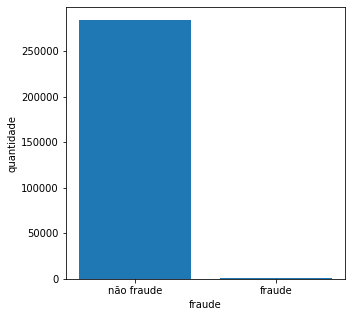

In [ ]:
CLASS = df_credit['Class'].value_counts().index
count = df_credit['Class'].value_counts()
print('fraude: não fraude {} fraude {} '.format(count[1],count[0]))

fig = plt.figure(figsize=(5,5))

plt.bar(CLASS,count, tick_label=['não fraude','fraude'])
plt.xlabel('fraude')
plt.ylabel('quantidade')
plt.show()

## Análise do comportamento temporal das transações

Uma análide de KDE na série temporal de transações, deparados em fraude e não fraude, nos mostra que apesar de também haver fraudes em horários de pico, proporcionalmente é mais provável que as fraudes ocorram em horários fora do fico.  Em outras palavras, dentre os fraudulentos a chance é maior de que eles façam uma fraude fora do horário de pico, do que os não fraudulentos façam uma transação válida. 

In [ ]:
class_0 = df_credit.loc[df_credit['Class'] == 0]["Time"]
class_1 = df_credit.loc[df_credit['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['não fraude', 'fruade']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=['green','red'], show_rug=False,)
fig['layout'].update(title='Kernel density probability (KDE) para serie temporal das transações', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Nesta etapa vamos estudar o comportamento dos valores transacionados ao longo das horas. Para entender se há alguma diferença as fraudes e não fraudes. Qual é a média, total, mediana, minimo, máximo e variação dos valores em cada hora?

Para esta tarefa Foi criado um novo DataFrame, convertendo o tempo em segundos para horas, agrupando em horas e classe e agregando os valores dentre as medidas cidadas. 

In [ ]:
#converte segundos em horas
df_credit['Hour'] = df_credit['Time'].apply(lambda x: np.floor(x/3600))

tmp = df_credit.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.00,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.00,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.00,4002.88,1555,106989.39,68.803466,17.900,45355.430437
...,...,...,...,...,...,...,...,...,...
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6458,449369.58,69.583397,15.000,132269.354973
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4852,333212.69,68.675328,14.000,56123.940988


**Valores totais das transições por hora**

Podemos notar que que as trasações não fraude possuem um padrão muito bem definido: Elas e intensificam as 7h e voltam a cair as 22h, o que corresponde razoavelmente há um horário ativo da população.

Porém as transações Fraude não seguem os mesmo padrões, podemos perceber um pico as 11h, e valores que oscilam em uma frequência de aproximadamente 2.52h


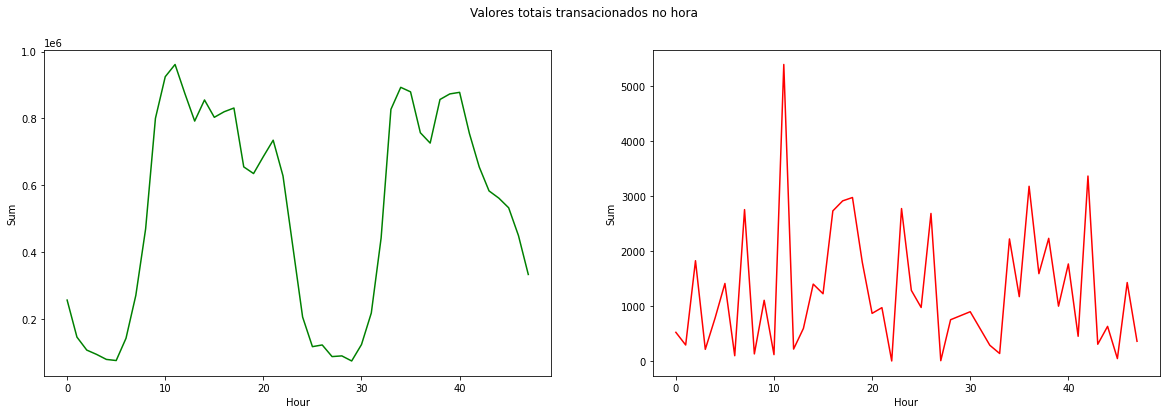

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0],color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red",)
plt.suptitle("Valores totais transacionados no hora")
plt.show();


**Número total de transações por hora**

Podemos notar que o número de transações não fraude seguem o mesmo padrão de horário ativo da população (7h às 23h)

Já as transações fraudulentas não possuem um momento do dia específico, com excessão de dois picos de muita transação as 11h e as 26h. 

Obs. Esses pontos podem ser outliers, algum crime pontual.

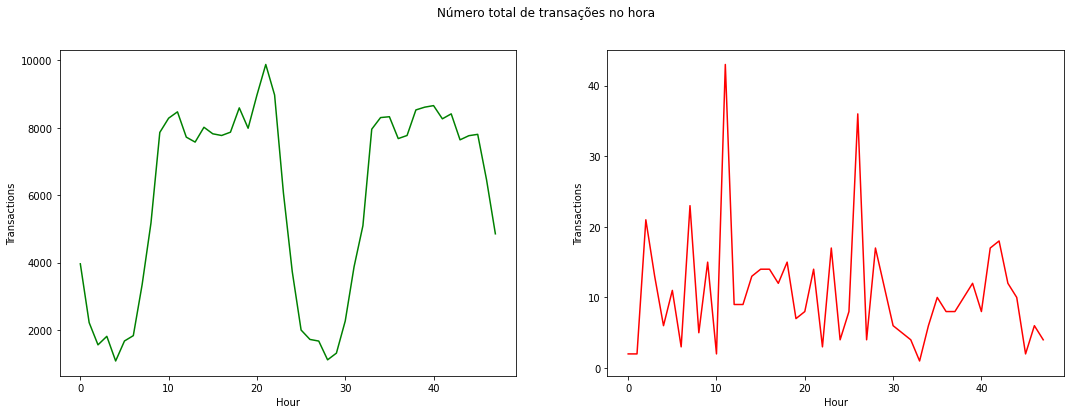

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0],color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Número total de transações no hora")
plt.show();

**Número médio de transações por hora**

Podemos notar que a média reduz um o efeito dos dois picos pontuais. Novamente um padrão de transações em horário atipo para não fraude e um padrão oscilatório nas fraudes. 

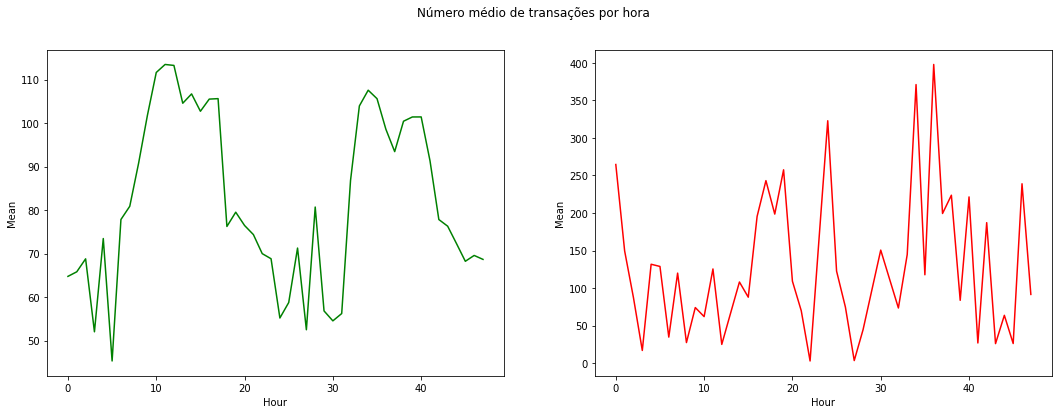

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0],color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Número médio de transações por hora")
plt.show();

**Valor máximo de transações por hora**

No caso de não fraude ocorre um pico as 13h , outro as 26h e outro as 46h. No caso da fraude, nao há picos bem definidos

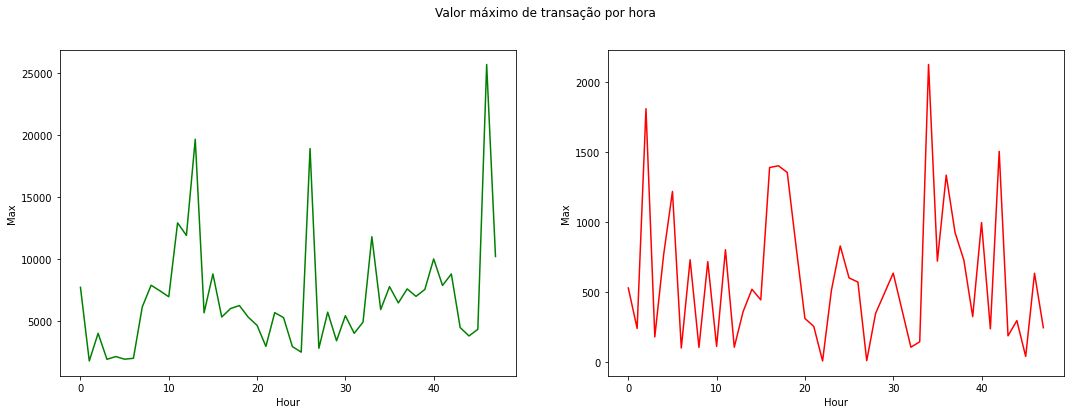

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0],color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Valor máximo de transação por hora")
plt.show();

**Mediana de rtansações por hora**

Usando a media, que da menor peso aos valores extremos, podemos notar que no caso de não fraude ocorre um pico pela manhã 7h-12h e 31h-36h e depois o valor decai até o fim da madrugada

Já os casos de fraude possuem o mesmo padrão ciclico 

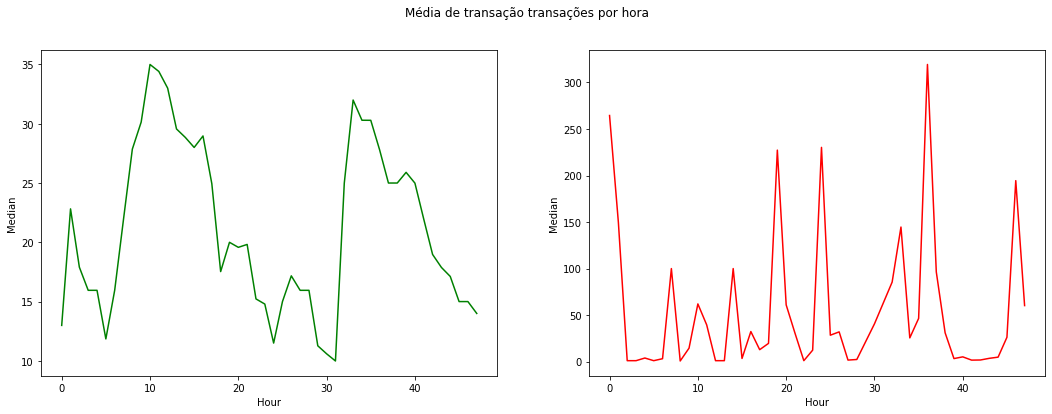

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0],color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Médiana de transação transações por hora")
plt.show();

**valor mínimo de transações por hora**

É possível notar que nos não fraudes sempre há transações com valores zerados, provavelmente são verificações de serviços para validar cartões de crédito.

Já nos casos de fraude sempre há um valor diferente de zero

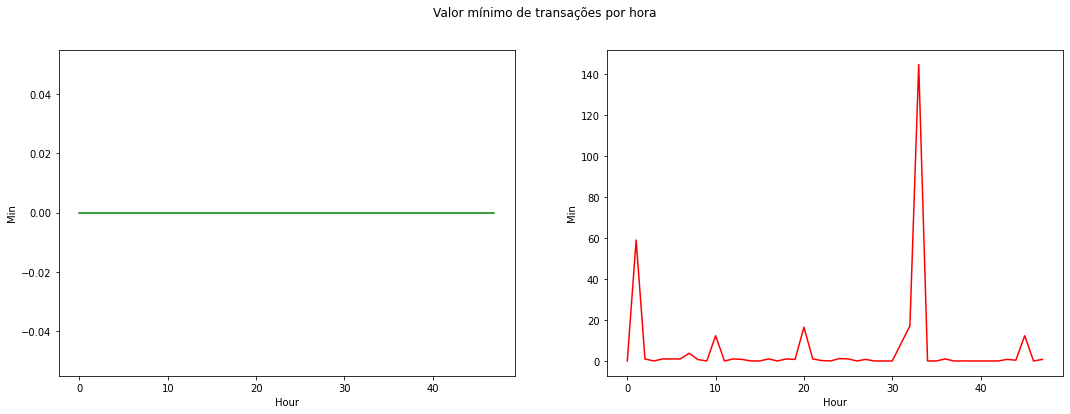

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0],color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Valor mínimo de transações por hora")
plt.show();

# Lidando com a escala e distribuição dos dados

Todas as variáveis V* são resultados de um PCA, portanto ja estão "escalonadas". Porém, a variável Time, Hour e Amount não foram escaladas e iremos fazer isso utilizando a fgunção *RobustScaler* que é menos senssível à outliers.

O outro ponto é lidar com a distribuição das classes, como vimos a classe está altamente desbalanceada (492fraudess 284315 não fraudes). Para tratar isso iremos aplicar a técnica de *Random Under-Sampling*, esoclhendo 492 amostras de não fraude para criar um novo dataset balanceado 50/50. 




## Escalando variáveis 

Nesta etapa iremos escalar as variáveis *Amount, time e Hour*

In [ ]:
from sklearn.preprocessing import RobustScaler


rob_scaler = RobustScaler()

df_credit['scaled_amount'] = rob_scaler.fit_transform(df_credit['Amount'].values.reshape(-1,1))
df_credit['scaled_time'] = rob_scaler.fit_transform(df_credit['Time'].values.reshape(-1,1))
df_credit['scaled_hour'] = rob_scaler.fit_transform(df_credit['Hour'].values.reshape(-1,1))

scaled_amount = df_credit['scaled_amount']
scaled_time = df_credit['scaled_time']
scaled_hour = df_credit['Hour']

df_credit.drop(['scaled_amount', 'scaled_time','scaled_hour'], axis=1, inplace=True)
df_credit.insert(0, 'scaled_amount', scaled_amount)
df_credit.insert(1, 'scaled_time', scaled_time)
df_credit.insert(2, 'scaled_hour', scaled_hour)

df_credit.drop(['Time','Amount', 'Hour'], axis=1, inplace=True)
df_credit.head()


,scaled_amount,scaled_time,scaled_hour,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Separando a base de dados

Nessa etapa iremos separar a base de dados original em Original_\*treino e Original_\*teste para podermos testar nosso modelo. Devemos realizar os testes no dado original e não na base de dados balanceada que iremos criar. Queremos testar se o fato de balancearmos a base de dados irá melhorar ou não a performace do modelo, comparado com uma base desbalanceada. E ambos os modelos deve ser testados na mesma base de testes original.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold


print('original não fraude', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('original fraude', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')

# Separa a classe e as variáveis do data set original
X = df_credit[['V4', 'V12', 'V10', 'V3', 'V17', 'V7', 'V6','V11']]
y = df_credit['Class']

# realiza a separação do data set orginal em teino e teste, usando StratifiedKFold para manter a proporção 
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    Original_Xtrain, Original_Xtest = X.iloc[train_index], X.iloc[test_index]
    Original_ytrain, Original_ytest = y.iloc[train_index], y.iloc[test_index]
# Agora vamos verificar se as distribuições estão iguais 

df_train =Original_Xtrain
df_train['Class'] = Original_ytrain
Original_Xtrain = Original_Xtrain.drop('Class', axis=1)
original_Xtrain = Original_Xtrain.values
original_Xtest = Original_Xtest.values
original_ytrain = Original_ytrain.values
original_ytest = Original_ytest.values

# verificar se o treino e teste estão igualmente distribuidos após a divisão 
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('distribuição após separação: \n')
print('treino',train_counts_label/ len(original_ytrain))
print('teste',test_counts_label/ len(original_ytest))

original não fraude 99.83 % of the dataset
original fraude 0.17 % of the dataset
----------------------------------------------------------------------------------------------------
distribuição após separação: 

treino [0.99827076 0.00172924]
teste [0.99827952 0.00172048]


## Balanceamento das classes (Random Under-Sampling)

Nessa etapa iremos aplicar uma método de redução de amostras para balancear as classes , criando um data set 50/50 entre fraudes e não fraudes. Aqui iremos perder muita informação, pois iremos sair de um data set de 284807 para 394, ainda iremos testar se foi uma boa estratégia comparado com não realizar a técnica.

In [ ]:
df_train['Class'].sum()

394

Distribuição das classes no df_balanceado
0    0.5
1    0.5
Name: Class, dtype: float64


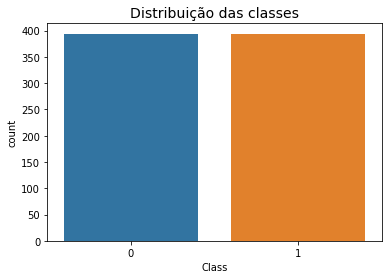

In [ ]:
# antes de escolher quais variáveis iremos trazer para o novo data set, vamos randomizar os dados. 
df_credit_resu = df_train[['V4', 'V12', 'V10', 'V3', 'V17', 'V7', 'V6','V11','Class']].sample(frac=1)

# Agora pegamos os 492 primeiros valores 
df_fraude = df_credit_resu.loc[df_credit['Class'] == 1]
df_n_fraude = df_credit_resu.loc[df_credit['Class'] == 0][:df_train['Class'].sum()]

df_tmp = pd.concat([df_fraude, df_n_fraude])

# randomizar o nomo fataset

df_balanceado = df_tmp.sample(frac=1, random_state=42)

print('Distribuição das classes no df_balanceado')
print(df_balanceado['Class'].value_counts()/len(df_balanceado))

sns.countplot(data=df_balanceado,x='Class')
plt.title('Distribuição das classes', fontsize=14)
plt.show()

# Correlações

Agora iremos avalias as correlações entre as variáveis tanto para o dataset original, quando para o dataset balanceado. Iremos considerar na análise somente o data set balanceado, portanto o original é meramente curiosidade.

* Correlações positivas: V4(0.71) e V11(0.68) tiveram correlação relevante

* Correlações negativas: V12(-0.68), V10(-0.63), V3(-0.57), V17(-0.56), V7(-0.48) e V6(0.4)tiveram correlações relevantes 


In [ ]:
def correlation_list(df, method='pearson'):  
    df_aux_cor = df.corr(method=method).reset_index()

    df_melt_cor = pd.melt(df_aux_cor,value_vars=df_aux_cor.columns,id_vars='index').sort_values(by='value')

    df_melt_cor = df_melt_cor.loc[df_melt_cor['value']!=1]

    df_melt_cor = df_melt_cor.drop_duplicates('value')

    df_melt_cor['abs_value'] = df_melt_cor['value'].abs()

    df_melt_cor = df_melt_cor.sort_values(by='abs_value', ascending=False)
    return df_melt_cor[df_melt_cor['variable']=='Class'].head(20)
print('Correlações entre o dataset balanceado')
correlation_list(df_balanceado)

Correlações entre o dataset balanceado


,index,variable,value,abs_value
72,V4,Class,0.697962,0.697962
74,V10,Class,-0.648542,0.648542
76,V17,Class,-0.597825,0.597825
75,V3,Class,-0.582053,0.582053
78,V6,Class,-0.368011,0.368011


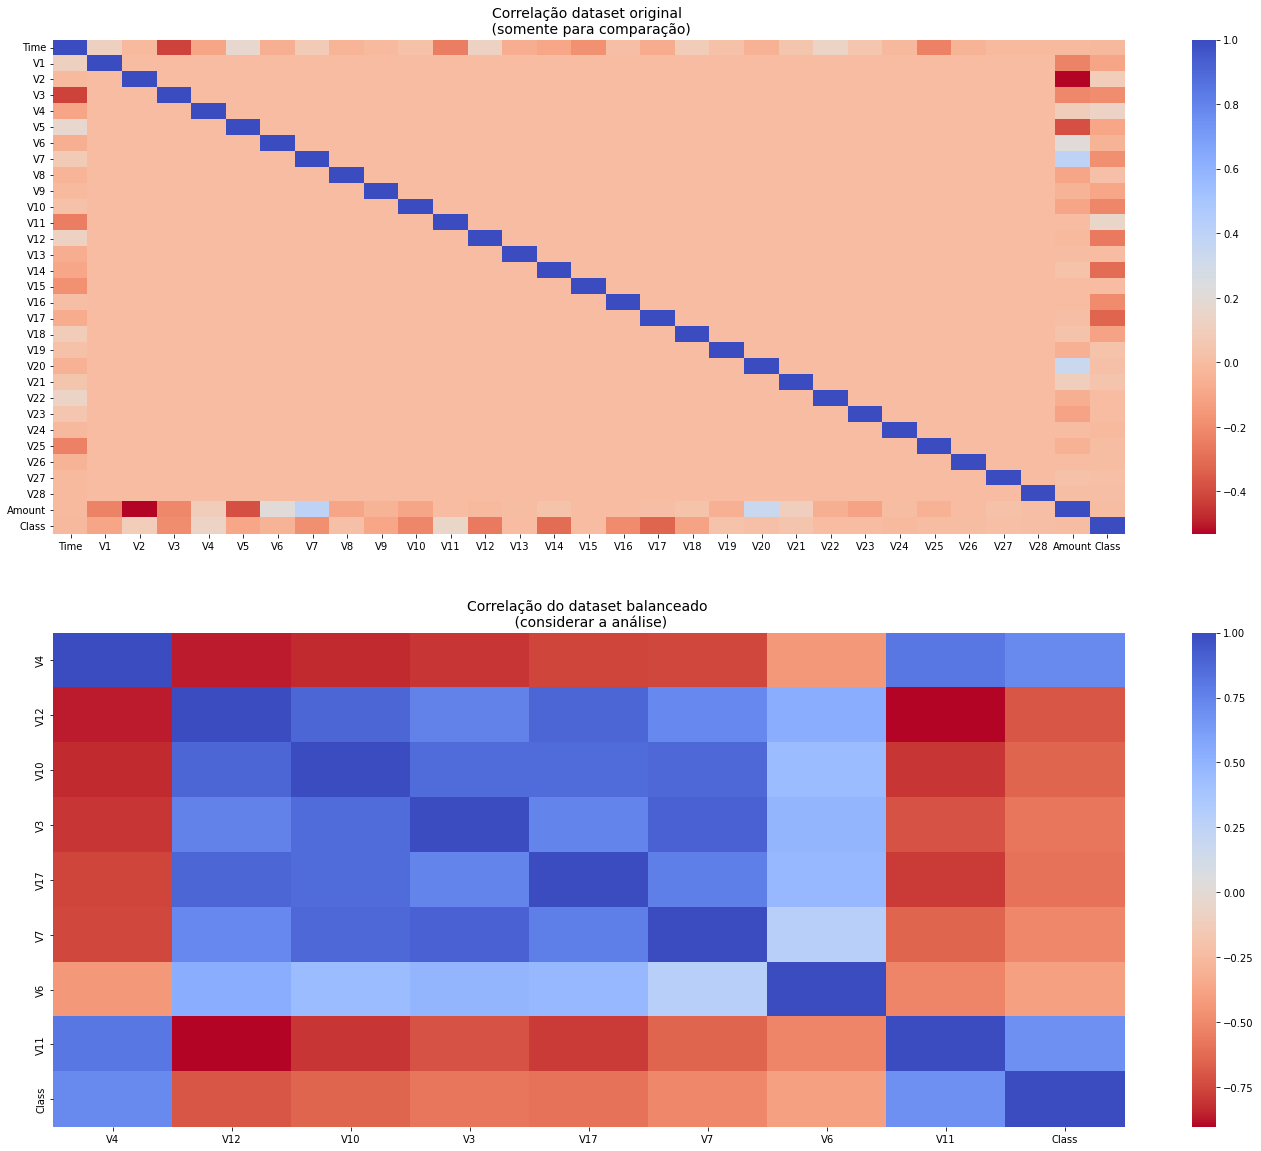

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr_original = df_credit.corr()
sns.heatmap(corr_original, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlação dataset original \n (somente para comparação)", fontsize=14)


corr_balanceado = df_balanceado.corr()
sns.heatmap(corr_balanceado, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Correlação do dataset balanceado \n (considerar a análise)', fontsize=14)
plt.show()

## entendendo as variáveis com maior correlação 

Podemos perceber que apesar da correlação ser grande, existem muitos outliers, podemos explorar a remoção deles para melhorar o desempenho do nosso modelo. 

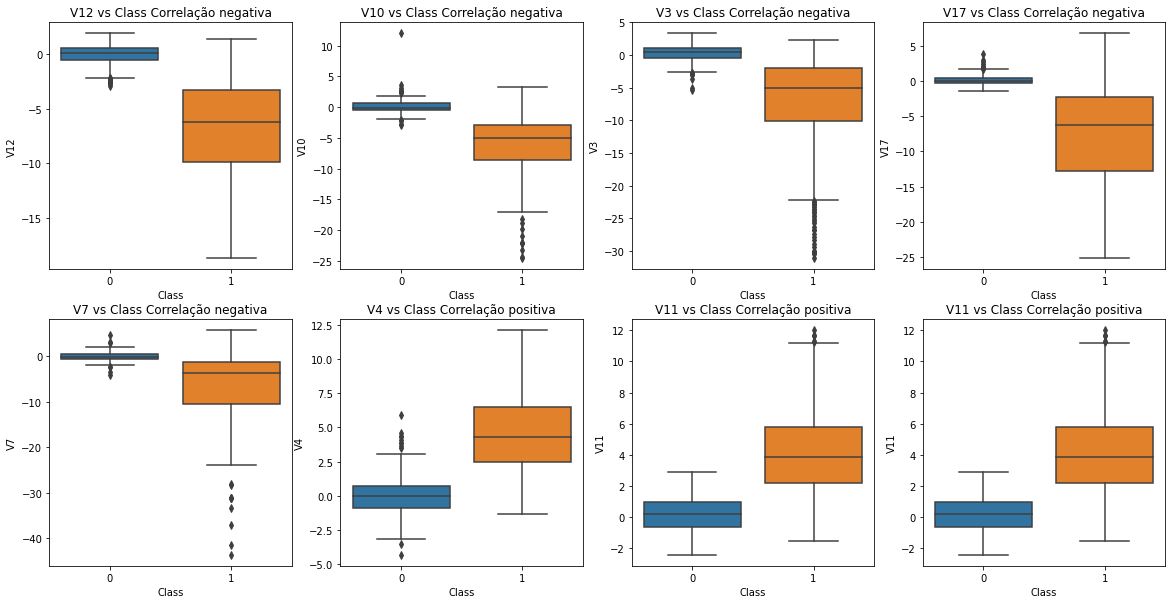

In [ ]:
f, axes = plt.subplots(ncols=4,nrows=2, figsize=(20,10))

sns.boxplot(x="Class", y="V12", data=df_balanceado, ax=axes[0,0])
axes[0,0].set_title('V12 vs Class Correlação negativa')

sns.boxplot(x="Class", y="V10", data=df_balanceado, ax=axes[0,1])
axes[0,1].set_title('V10 vs Class Correlação negativa')

sns.boxplot(x="Class", y="V3", data=df_balanceado, ax=axes[0,2])
axes[0,2].set_title('V3 vs Class Correlação negativa')

sns.boxplot(x="Class", y="V17", data=df_balanceado, ax=axes[0,3])
axes[0,3].set_title('V17 vs Class Correlação negativa')

sns.boxplot(x="Class", y="V7", data=df_balanceado, ax=axes[1,0])
axes[1,0].set_title('V7 vs Class Correlação negativa')

sns.boxplot(x="Class", y="V4", data=df_balanceado, ax=axes[1,1])
axes[1,1].set_title('V4 vs Class Correlação positiva')

sns.boxplot(x="Class", y="V11", data=df_balanceado, ax=axes[1,2])
axes[1,2].set_title('V11 vs Class Correlação positiva')

sns.boxplot(x="Class", y="V11", data=df_balanceado, ax=axes[1,3])
axes[1,3].set_title('V11 vs Class Correlação positiva')

plt.show()

# Classificadores (Modelos) dataset downsample

In [ ]:
df_balanceado.columns

Index(['V4', 'V12', 'V10', 'V3', 'V17', 'V7', 'V6', 'V11', 'Class'], dtype='object')

In [ ]:
df_balanceado['Class'].sum()

394

In [ ]:
# vamos criar as features e targets para treinar nossos modelos, utilizando o dataset balanceado
X = df_balanceado.drop(['Class'], axis=1)
y = df_balanceado['Class']

In [ ]:
# Vamos separar o dataset em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#vamos criar alguns classificadores parar comparar quais serão os melhores.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classificador: ", classifier.__class__.__name__, "Acuracia em treino", round(training_score.mean(), 2) * 100, "%")

Classificador:  LogisticRegression Acuracia em treino 94.0 %
Classificador:  KNeighborsClassifier Acuracia em treino 93.0 %
Classificador:  SVC Acuracia em treino 91.0 %
Classificador:  DecisionTreeClassifier Acuracia em treino 89.0 %
Classificador:  RandomForestClassifier Acuracia em treino 94.0 %


Escolhendo os melhores parâmetros para cada modelo utilizando a técnica de GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Coletamos os melhores parâmetros para a Lofistic Regression
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#----------------------------------------------------------
# KNC
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# Coletamos os melhores parâmetros para o KNC
knears_neighbors = grid_knears.best_estimator_
#----------------------------------------------------------
# SVC
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# Coletamos os melhores parâmetros para o SVC
svc = grid_svc.best_estimator_
#----------------------------------------------------------
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# Coletamos os melhores parâmetros para DecisionTreeClassifier
tree_clf = grid_tree.best_estimator_
#----------------------------------------------------------
# RandomForest classifier
Forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_forest = GridSearchCV(RandomForestClassifier(), Forest_params)
grid_forest.fit(X_train, y_train)

# Coletamos os melhores parâmetros para o RandomForestClassifier
forest_clf = grid_forest.best_estimator_

In [ ]:

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


forest_score = cross_val_score(forest_clf, X_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(forest_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.65%
Knears Neighbors Cross Validation Score 93.97%
Support Vector Classifier Cross Validation Score 94.29%
DecisionTree Classifier Cross Validation Score 92.7%
RandomForest Classifier Cross Validation Score 92.86%


In [ ]:

# Plotando as curvas de aprendizado
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4,estimator5, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3, figsize=(25,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Logistic Regression
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # KNC 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # SVC
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Decision tree classifier
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

        # Random Forest Classifier
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

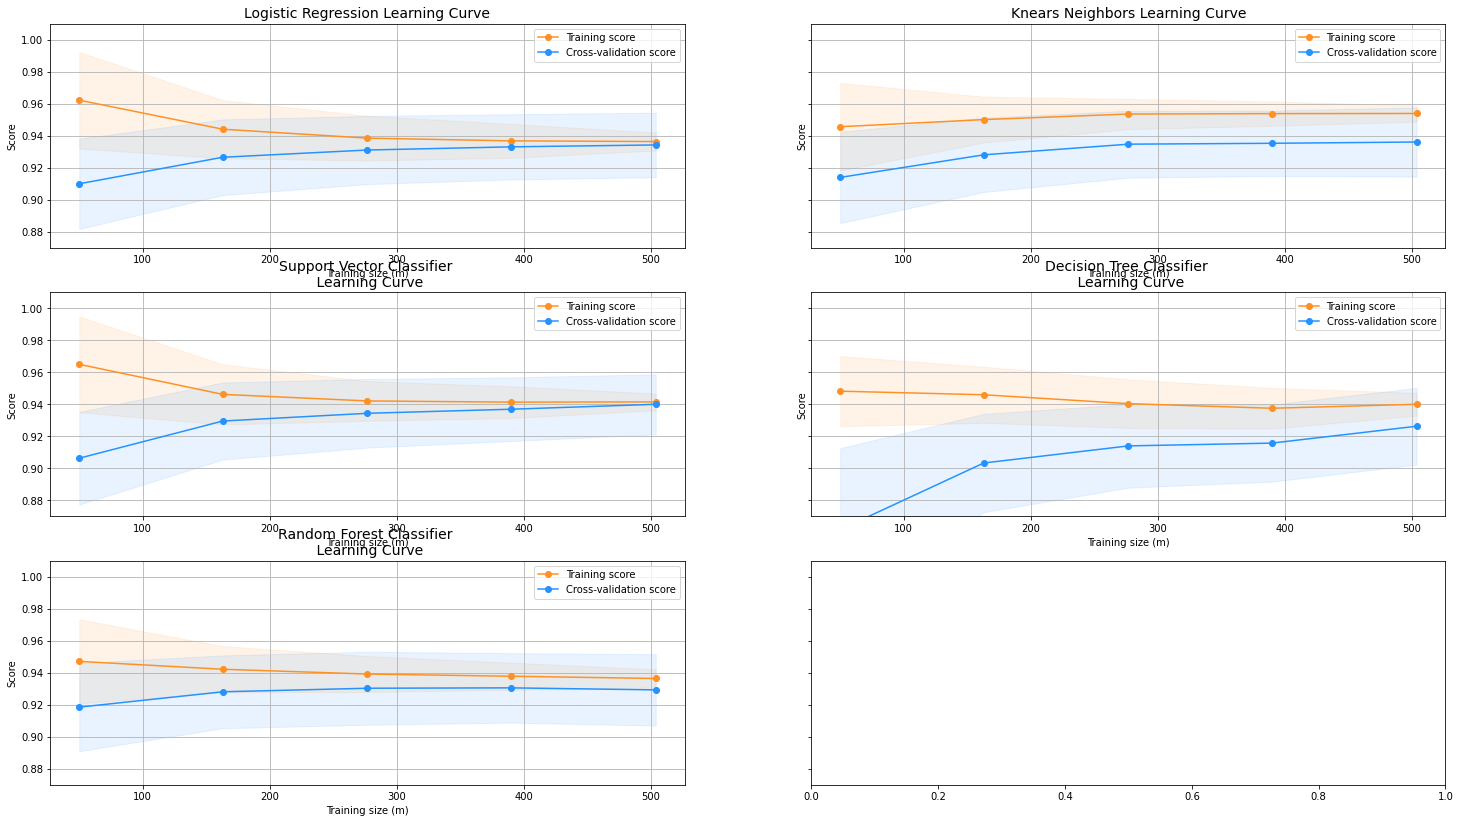

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf,forest_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

Cálculando a área sobre a curva ROC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)


In [ ]:
from sklearn.metrics import roc_auc_score

print('área ROC Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('área ROC  KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('área ROC  Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('área ROC  Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('área ROC Random Forest Classifier: ', roc_auc_score(y_train, forest_pred))

Logistic Regression:  0.9615431152698235
KNears Neighbors:  0.9387351778656126
Support Vector Classifier:  0.9639227232394934
Decision Tree Classifier:  0.9260304912478825
Random Forest Classifier:  0.9256070016939583


Plotando as curvas ROC

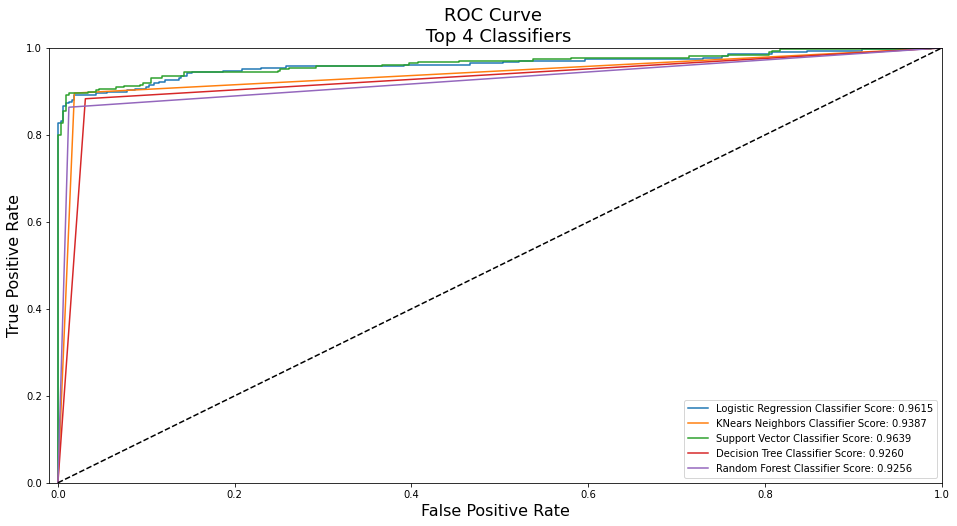

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
forest_fpr, forest_tpr, forest_threshold = roc_curve(y_train, forest_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(forest_fpr, forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, forest_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
   
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Balanceamento das classes (Over sampling)
Nesta etapa iremos balancear a base de dados mas agora criando pontos sintéticos para aumentar o número de fraudes ou invés de reduzir os não fraudes. Para isso iremos utilizar uma técnica chamada SMOTE, essa técnica utiliza a posição entre os vizinhos próximos para criar um novo ponto entre eles. Ou seja ela cria diversos outros pontos DENTRO do volume que compões as fraudes. O problema dessa técnica é que ela não acrescenta varições, ou seja, nunca será criado um ponto levemente fora do volume original, fortalecendo qualquer viés que o data set original carregue.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()



log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9583405439174818
precision: 0.07114607727013418
recall: 0.9010386238234339
f1: 0.12816165225017442
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     56863
       Fraud       0.13      0.85      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.92      0.61     56961
weighted avg       1.00      0.99      0.99     56961



In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.955696
1,Oversampling (SMOTE),0.990292


COnclusão

Neste trabalho, foi desenvolvido a avaliação do comportamento fraudulendo, a avaliação do desbalanceamento da base, o treinamento e avaliação de 5 modelos com os dados balanceados Under Sampling e a comparação do modelo de regressão logistica para o balanceamento undersample e oversample. É interessante notar que ambos os datasets estavam igualmente balanceados, Porém a uso da técnica de Undersampling em um dataset com tão poucos dados de uma das classes acababa perdendo muita informação. Ou seja, nesses casos é melhor aplicar o SMOTE e criar dados fictícios ao invés de tirar os existentes.